In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [2]:
df=pd.read_csv('mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
model    32 non-null object
mpg      32 non-null float64
cyl      32 non-null int64
disp     32 non-null float64
hp       32 non-null int64
drat     32 non-null float64
wt       32 non-null float64
qsec     32 non-null float64
vs       32 non-null int64
am       32 non-null int64
gear     32 non-null int64
carb     32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [4]:
df['model'].value_counts()

AMC Javelin            1
Merc 240D              1
Merc 450SE             1
Datsun 710             1
Merc 280               1
Mazda RX4              1
Lotus Europa           1
Ferrari Dino           1
Merc 280C              1
Volvo 142E             1
Toyota Corona          1
Pontiac Firebird       1
Porsche 914-2          1
Merc 450SL             1
Dodge Challenger       1
Valiant                1
Fiat X1-9              1
Toyota Corolla         1
Merc 450SLC            1
Ford Pantera L         1
Hornet Sportabout      1
Mazda RX4 Wag          1
Cadillac Fleetwood     1
Honda Civic            1
Fiat 128               1
Duster 360             1
Merc 230               1
Lincoln Continental    1
Hornet 4 Drive         1
Camaro Z28             1
Maserati Bora          1
Chrysler Imperial      1
Name: model, dtype: int64

In [5]:
#since model doesnot have any significance we can drop it
df.drop('model',axis=1,inplace=True)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
cyl,32.0,6.187500,1.785922,4.000,4.00000,6.000,8.00,8.000
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
vs,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
am,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
gear,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


In [7]:
cat=['cyl','vs','am','gear','carb']

mpg        AxesSubplot(0.125,0.657941;0.227941x0.222059)
disp    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
hp      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
drat       AxesSubplot(0.125,0.391471;0.227941x0.222059)
wt      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
qsec    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

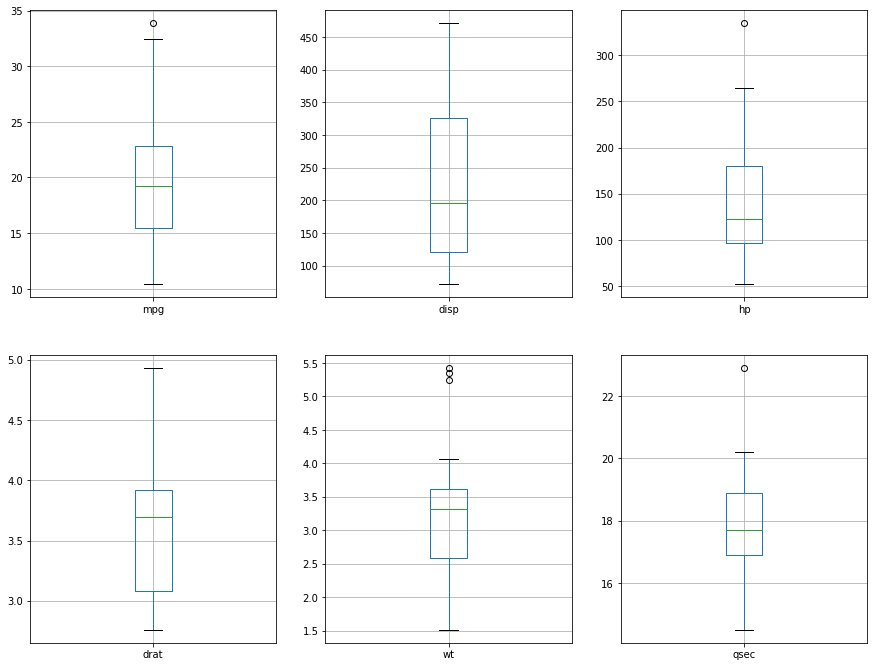

In [8]:
df.drop(columns=cat).plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False,grid=True,figsize=(15,18))

In [9]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [10]:
#outlier treatment:
cols=['mpg','hp','wt','qsec'] 
df[cols]=df[cols].apply(lambda x:np.log(x))
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,3.044522,6,160.0,4.700480,3.90,0.963174,2.800933,0,1,4,4
1,3.044522,6,160.0,4.700480,3.90,1.056053,2.834389,0,1,4,4
2,3.126761,4,108.0,4.532599,3.85,0.841567,2.923699,1,1,4,1
3,3.063391,6,258.0,4.700480,3.08,1.167827,2.967333,1,0,3,1
4,2.928524,8,360.0,5.164786,3.15,1.235471,2.834389,0,0,3,2


mpg        AxesSubplot(0.125,0.657941;0.227941x0.222059)
disp    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
hp      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
drat       AxesSubplot(0.125,0.391471;0.227941x0.222059)
wt      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
qsec    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

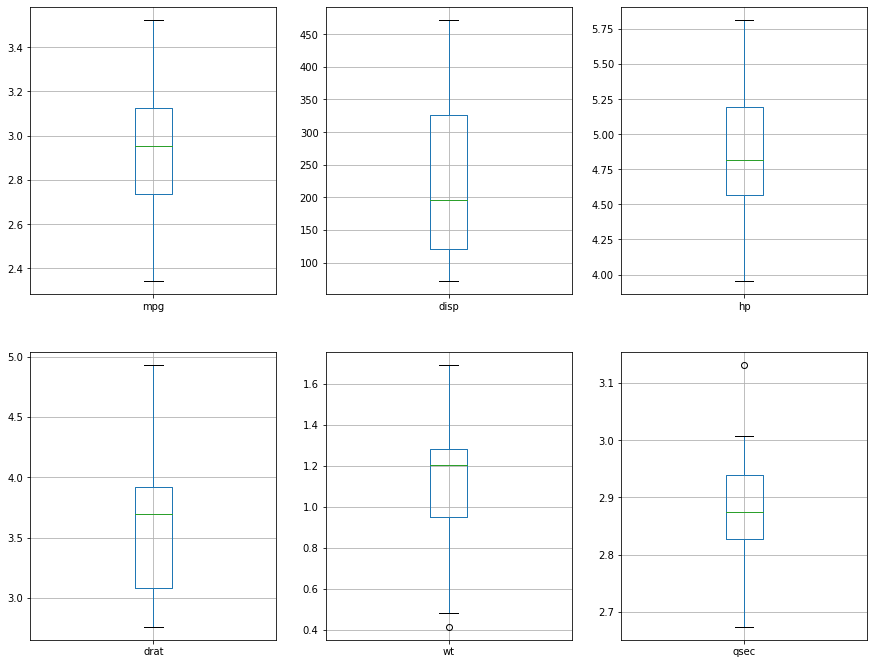

In [11]:
df.drop(columns=cat).plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False,grid=True,figsize=(15,18))

In [12]:
def outlier(X):
    q1=X.quantile(q=0.25)
    q3=X.quantile(q=0.75)
    IQR=q3-q1
    LW=q1-1.5*IQR
    RW=q3+1.5*IQR
    X[X<LW]=LW
    X[X>RW]=RW
    return X

In [13]:
df['wt']=outlier(df['wt'])
df['qsec']=outlier(df['qsec'])

C:\Users\erict\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\erict\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


mpg        AxesSubplot(0.125,0.657941;0.227941x0.222059)
disp    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
hp      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
drat       AxesSubplot(0.125,0.391471;0.227941x0.222059)
wt      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
qsec    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

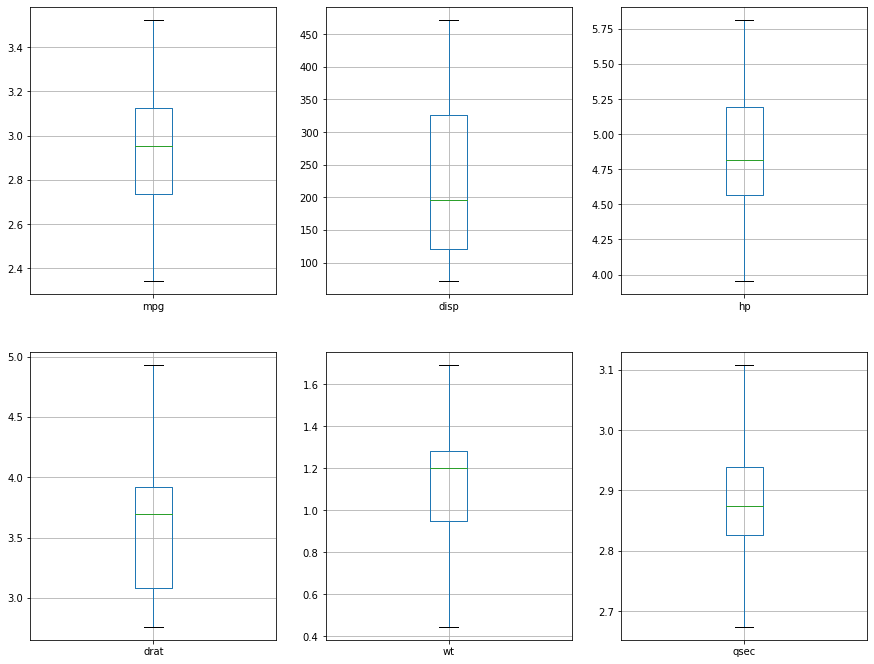

In [14]:
df.drop(columns=cat).plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False,grid=True,figsize=(15,18))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000267B0E20860>,
      dtype=object)

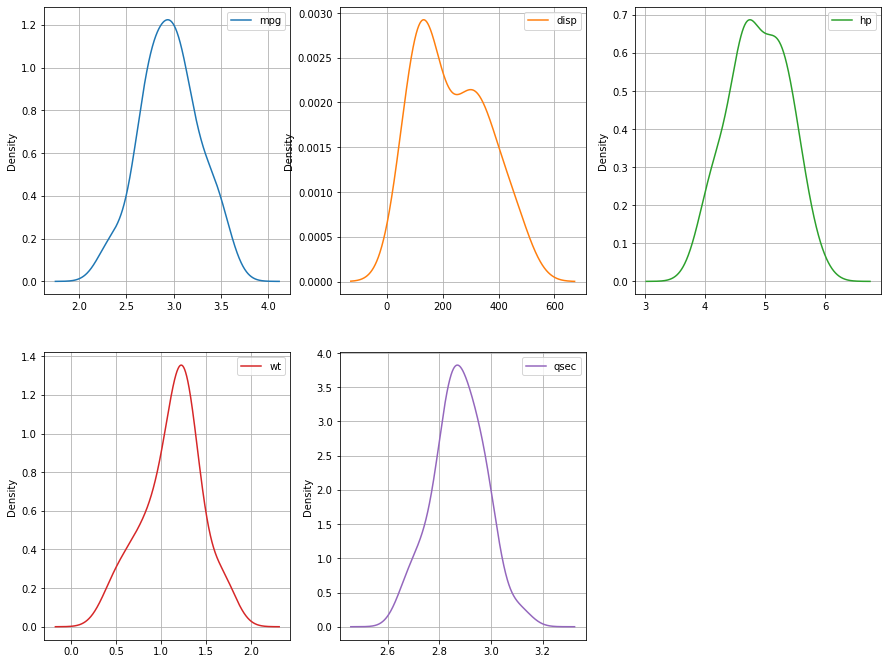

In [15]:
df[['mpg','disp','hp','wt','qsec']].plot(kind='kde',subplots=True,layout=(3,3),sharex=False,sharey=False,grid=True,figsize=(15,18))

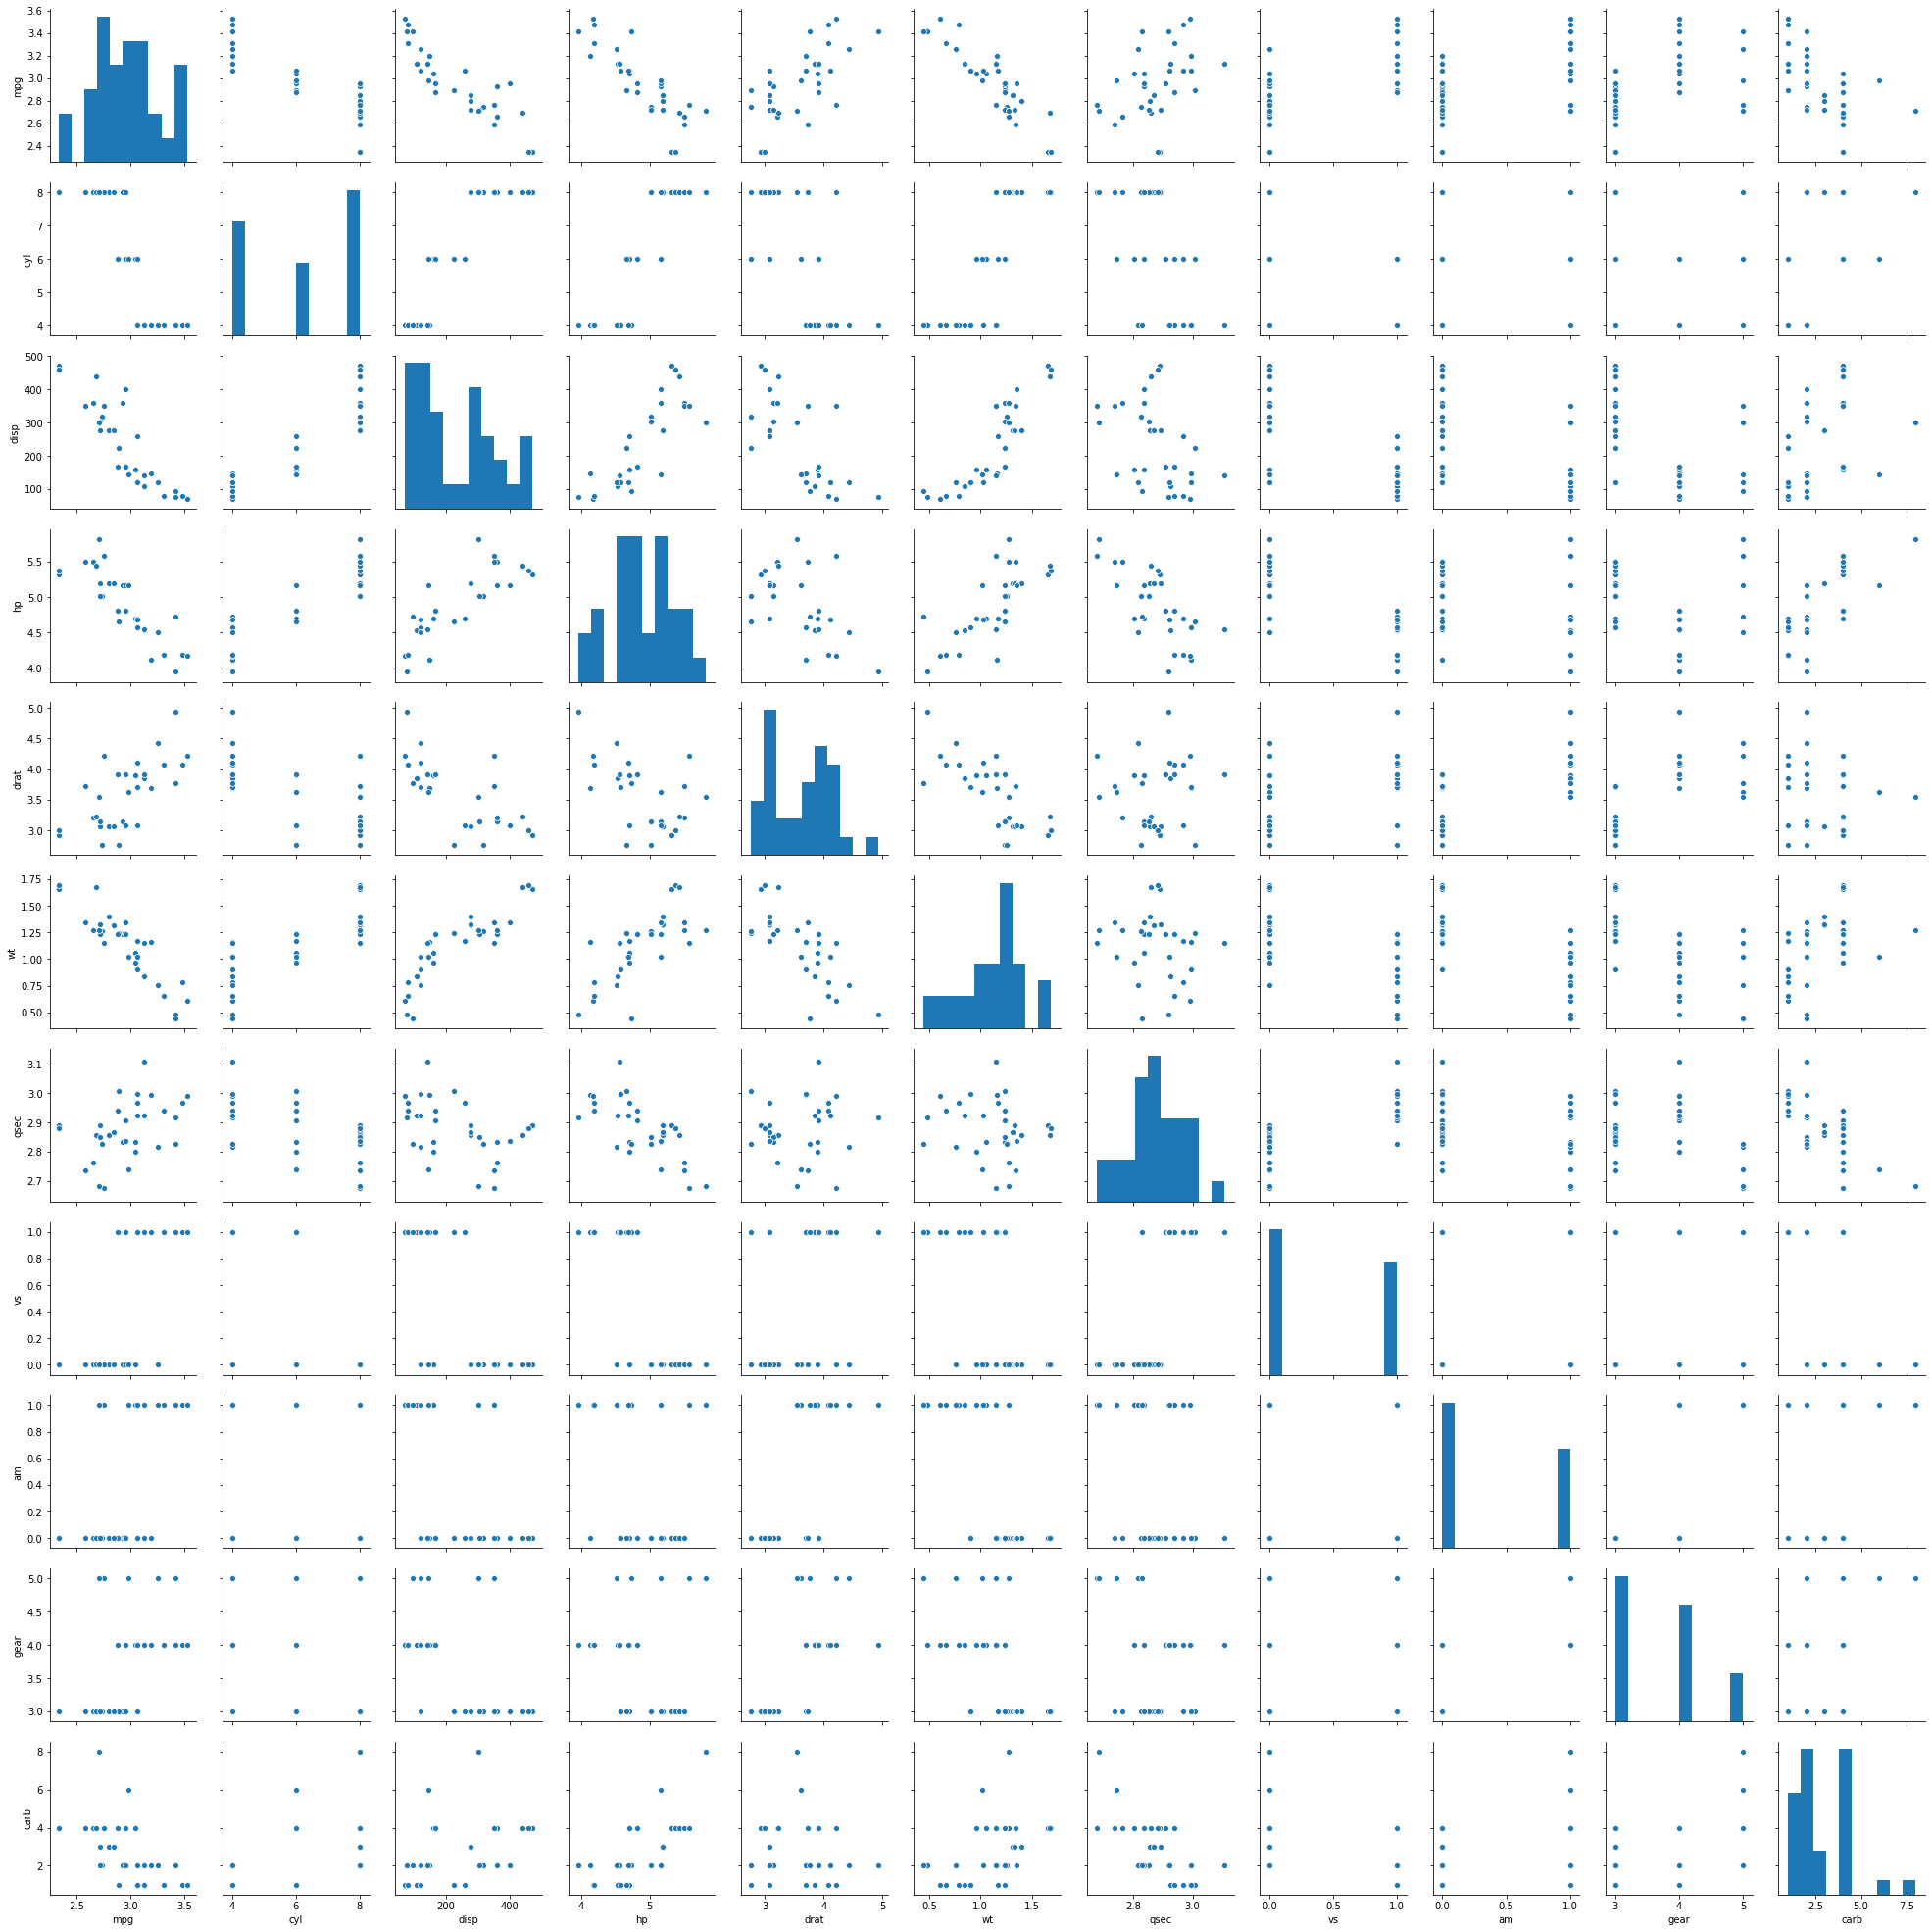

In [16]:
sns.pairplot(df,kind='scatter')

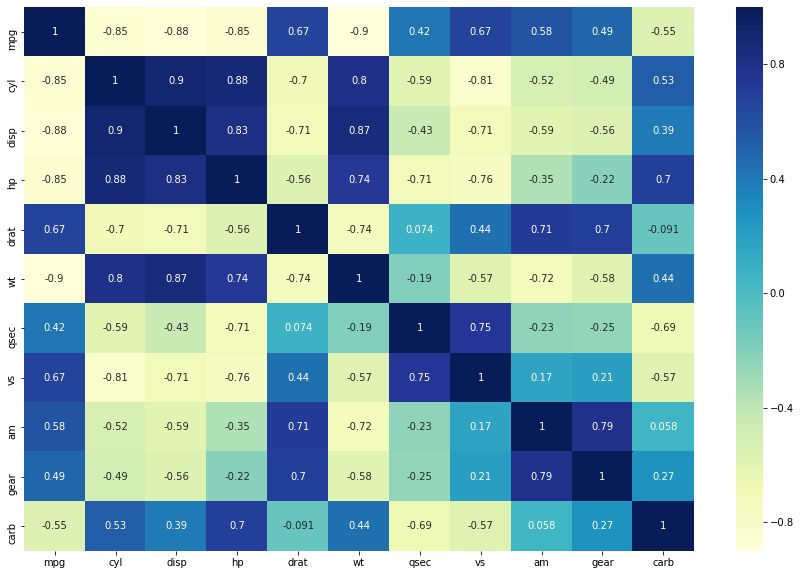

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

# Data Preperation(modelling)

In [18]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,3.044522,6,160.0,4.700480,3.90,0.963174,2.800933,0,1,4,4
1,3.044522,6,160.0,4.700480,3.90,1.056053,2.834389,0,1,4,4
2,3.126761,4,108.0,4.532599,3.85,0.841567,2.923699,1,1,4,1
3,3.063391,6,258.0,4.700480,3.08,1.167827,2.967333,1,0,3,1
4,2.928524,8,360.0,5.164786,3.15,1.235471,2.834389,0,0,3,2


In [19]:
for i in cat:
    print(df[i].value_counts())

8    14
4    11
6     7
Name: cyl, dtype: int64
0    18
1    14
Name: vs, dtype: int64
0    19
1    13
Name: am, dtype: int64
3    15
4    12
5     5
Name: gear, dtype: int64
4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64


In [20]:
cols=['cyl','gear','carb']
df=pd.get_dummies(data=df, columns=cols,drop_first=True)
df.head()

,mpg,disp,hp,drat,wt,qsec,vs,am,cyl_6,cyl_8,gear_4,gear_5,carb_2,carb_3,carb_4,carb_6,carb_8
0,3.044522,160.0,4.700480,3.90,0.963174,2.800933,0,1,1,0,1,0,0,0,1,0,0
1,3.044522,160.0,4.700480,3.90,1.056053,2.834389,0,1,1,0,1,0,0,0,1,0,0
2,3.126761,108.0,4.532599,3.85,0.841567,2.923699,1,1,0,0,1,0,0,0,0,0,0
3,3.063391,258.0,4.700480,3.08,1.167827,2.967333,1,0,1,0,0,0,0,0,0,0,0
4,2.928524,360.0,5.164786,3.15,1.235471,2.834389,0,0,0,1,0,0,1,0,0,0,0


In [21]:
df.shape

(32, 17)

# Feature Selection

RFE

In [22]:

x=df.drop('mpg',axis=1)
y=df['mpg']
#optimum no of features to select for RFE
nof_list=np.arange(1,18)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 8
Score with 8 features: 0.749594


In [104]:
cols = list(x.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 8)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['hp', 'wt', 'am', 'gear_4', 'gear_5', 'carb_4', 'carb_6', 'carb_8'], dtype='object')


In [105]:
#Backward Elimination
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

C:\Users\erict\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['wt', 'gear_4', 'carb_4']


# Modelling

Building Base model

In [106]:
xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
model.summary()

C:\Users\erict\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     10.74
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           1.73e-05
Time:                        21:24:03   Log-Likelihood:                 34.220
No. Observations:                  32   AIC:                            -34.44
Df Residuals:                      15   BIC:                            -9.522
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1231      2.787      1.479      0.160      -1.817      10.064
disp           0.0014      0.001      1.140      0.272      -0.001       0.004
hp            -0.0264      0.198     -0.133      0.896      -0.449       0.397
drat           0.0612      0.106      0.577      0.573      -0.165       0.287
wt            -0.7385      0.330     -2.235      0.041      -1.443      -0.034
qsec          -0.1782      0.830     -0.215      0.833      -1.946       1.590
vs            -0.1056      0.131     -0.808      0.432      -0.384       0.173
am            -0.1780      0.156     -1.143      0.271      -0.510       0.154
cyl_6          0.0017      0.124      0.014      0.989      -0.262       0.265
cyl_8         -0.2813      0.310     -0.906      0.379      -0.943       0.381
gear_4         0.3167      0.185      1.713      0.107      -0.077       0.711
gear_5         0.1934      0.161      1.199      0.249      -0.150       0.537
carb_2        -0.1031      0.100     -1.034      0.318      -0.316       0.109
carb_3         0.0200      0.156      0.128      0.900      -0.313       0.353
carb_4        -0.3265      0.167     -1.958      0.069      -0.682       0.029
carb_6        -0.2067      0.219     -0.945      0.359      -0.673       0.259
carb_8        -0.2158      0.244     -0.884      0.391      -0.736       0.305
==============================================================================
Omnibus:                        7.552   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                5.994
Skew:                           0.853   Prob(JB):                       0.0499
Kurtosis:                       4.259   Cond. No.                     3.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Splitting the Data

In [108]:
X=df[['hp', 'wt', 'am', 'gear_4', 'gear_5', 'carb_4', 'carb_6', 'carb_8']]
y=df['mpg']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=0)

In [118]:
LR = LinearRegression()
LR.fit(xtrain,ytrain)
ypred=LR.predict(xtest)
rmse=np.sqrt(metrics.mean_squared_error(ytest,ypred))
print("RMSE Score : ",rmse)
r2=LR.score(xtrain,ytrain)
print("R2 : ",r2)

RMSE Score :  0.12015720064492989
R2 :  0.931498384371586


Using Kfold Validation

In [120]:
m1=LinearRegression()
m2=Ridge()
m3=Lasso()
m4=ElasticNet()

In [121]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf=KFold(n_splits=3,shuffle=True,random_state=0)
for model,name in zip([m1,m2,m3,m4],['Linear_Regression','Ridge','Lasso','ElasticNet']):
    rmse=[]
    for train_idx,test_idx in kf.split(x,y):#indexes of test and train willbe stored
        Xtrain,Xtest=x.iloc[train_idx,:],x.iloc[test_idx,:]
        Ytrain,Ytest=y.iloc[train_idx],y.iloc[test_idx]
        
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        #cm=metrics.confusion_matrix(Ytest,Y_predict)
        mse=metrics.mean_squared_error(Ytest,Y_predict)
        rmse.append(np.sqrt(mse))
    print(model.score(Xtrain,Ytrain))
    print('RMSE scores:%0.03f (+/-%0.5f)[%s]'%(np.mean(rmse),np.var(rmse,ddof=1),name))

0.9225991185670128
RMSE scores:0.393 (+/-0.08936)[Linear_Regression]
0.8779454740359574
RMSE scores:0.137 (+/-0.00071)[Ridge]
0.7467856784422965
RMSE scores:0.151 (+/-0.00054)[Lasso]
0.7474079872112589
RMSE scores:0.150 (+/-0.00065)[ElasticNet]


In [122]:
from sklearn.model_selection import GridSearchCV
param={'alpha':np.arange(0.01,1,0.01)}
gs=GridSearchCV(m2,param,cv=5)
gs.fit(X,y)
gs.best_params_

C:\Users\erict\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.24000000000000002}

In [123]:
from sklearn.model_selection import GridSearchCV
param={'alpha':np.arange(0.01,1,0.01)}
gs=GridSearchCV(m3,param,cv=5)
gs.fit(X,y)
gs.best_params_

C:\Users\erict\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.01}

In [124]:
param={'alpha':np.arange(0.01,1,0.01),'l1_ratio':np.arange(0.1,1,0.01)}
GS=GridSearchCV(m4,param,cv=3)
GS.fit(X,y)
GS.best_params_

C:\Users\erict\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.01, 'l1_ratio': 0.8899999999999996}

In [125]:
m1=LinearRegression()
m2=Ridge(alpha=0.24000000000000002,normalize=True)
m3=Lasso(alpha=0.01,normalize=True)
m4=ElasticNet(alpha=0.01,l1_ratio=0.8899999999999996,normalize=True)

In [126]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf=KFold(n_splits=3,shuffle=True,random_state=0)
for model,name in zip([m1,m2,m3,m4],['Linear_Regression','Ridge','Lasso','ElasticNet']):
    rmse=[]
    for train_idx,test_idx in kf.split(x,y):#indexes of test and train willbe stored
        Xtrain,Xtest=x.iloc[train_idx,:],x.iloc[test_idx,:]
        Ytrain,Ytest=y.iloc[train_idx],y.iloc[test_idx]
        
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        #cm=metrics.confusion_matrix(Ytest,Y_predict)
        mse=metrics.mean_squared_error(Ytest,Y_predict)
        rmse.append(np.sqrt(mse))
    print(model.score(Xtrain,Ytrain))
    print('RMSE scores:%0.03f (+/-%0.5f)[%s]'%(np.mean(rmse),np.var(rmse,ddof=1),name))

0.9225991185670128
RMSE scores:0.393 (+/-0.08936)[Linear_Regression]
0.8855233916588812
RMSE scores:0.119 (+/-0.00017)[Ridge]
0.8326578211789706
RMSE scores:0.120 (+/-0.00046)[Lasso]
0.8388902975234598
RMSE scores:0.118 (+/-0.00046)[ElasticNet]


Ridge is the best model